In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import load_digits
import pandas as pd

##LEER DATOS

In [39]:
file_name = "dataset.csv"
df = pd.read_csv(file_name)

name_columns = ["ID","diagnosis"]

for i in range(30):
  temp="feature "+str(i+1)
  name_columns.append(temp)

df.columns = name_columns
df



,ID,diagnosis,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,...,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30
0,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,...,24.990,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
1,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,...,23.570,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
2,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,...,14.910,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
3,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,...,22.540,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678
4,843786,M,12.45,15.70,82.57,477.1,1.278,0.170,1.578,8.089,...,15.470,23.75,103.40,741.6,1.791,5.249,5.355,1.741,3.985,1.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,111.000,1.159,2.439,1.389,...,25.450,26.40,166.10,2027.0,141.000,2.113,4.107,2.216,206.000,7.115
564,926682,M,20.13,28.25,131.20,1261.0,978.000,1.034,144.000,9.791,...,23.690,38.25,155.00,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
565,926954,M,16.60,28.08,108.30,858.1,8.455,1.023,9.251,5.302,...,18.980,34.12,126.70,1124.0,1.139,3.094,3.403,1.418,2.218,782.000
566,927241,M,20.60,29.33,140.10,1265.0,1.178,277.000,3.514,152.000,...,25.740,39.42,184.60,1821.0,165.000,8.681,9.387,265.000,4.087,124.000


In [40]:
df["diagnosis"] = np.where(df["diagnosis"] == "M", 1, 0)
# maligno=1     benigno=0
df["diagnosis"].value_counts()

0    357
1    211
Name: diagnosis, dtype: int64

In [43]:
df.describe()

,ID,diagnosis,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,...,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,0.371479,14.120491,19.305335,91.914754,654.279754,53.510222,28.932298,41.041495,36.119261,...,16.25315,25.691919,107.125053,878.578873,14.079620,33.637984,39.592438,43.964576,32.711371,56.137357
std,1.251246e+08,0.483626,3.523416,4.288506,24.285848,351.923751,192.848849,117.609161,142.247896,123.209549,...,4.82232,6.141662,33.474687,567.846267,55.359087,114.661283,132.330460,154.620733,90.060399,190.885566
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.100000,0.060000,0.000000,0.000000,...,7.93000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.210000,0.120000
25%,8.692225e+05,0.000000,11.697500,16.177500,75.135000,420.175000,1.136500,1.434000,1.683750,1.967750,...,13.01000,21.095000,84.102500,514.975000,1.223000,1.842000,1.913000,1.592000,2.526500,6.619500
50%,9.061570e+05,0.000000,13.355000,18.855000,86.210000,548.750000,8.297500,4.460000,3.155000,3.521500,...,14.96500,25.425000,97.655000,685.550000,1.376500,2.883500,3.463500,2.717000,2.869500,7.630000
75%,8.825022e+06,1.000000,15.780000,21.802500,103.875000,782.625000,9.383250,7.543500,6.184500,7.585500,...,18.76750,29.757500,125.175000,1073.500000,1.559750,5.210000,6.098500,7.779250,3.309250,8.554000
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,997.000000,958.000000,973.000000,974.000000,...,36.04000,49.540000,251.200000,4254.000000,997.000000,937.000000,942.000000,991.000000,544.000000,997.000000


##NORMALIZACIÓN

In [47]:
from sklearn.preprocessing import MinMaxScaler
normalize=df.columns[2:33]
scaler = MinMaxScaler()
df[normalize] = scaler.fit_transform(df[normalize])
df

,ID,diagnosis,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,...,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30
0,842517,1,0.643144,0.272574,0.615783,0.501591,0.008400,0.008147,0.893114,0.007204,...,0.606901,0.303571,0.539818,0.435214,0.001111,0.001885,0.002565,0.187689,0.505324,0.008809
1,84300903,1,0.601496,0.390260,0.595743,0.449417,0.000999,0.001607,0.002029,0.001313,...,0.556386,0.360075,0.508442,0.374508,0.001318,0.004424,0.004781,0.245207,0.006258,0.008665
2,84348301,1,0.210090,0.360839,0.233501,0.102906,0.001329,0.002901,0.002481,0.001080,...,0.248310,0.385928,0.241347,0.094008,0.001974,0.009140,0.007292,0.002598,0.011821,0.173421
3,84358402,1,0.629893,0.156578,0.630986,0.489290,0.000906,0.001324,0.203494,0.001071,...,0.519744,0.123934,0.506948,0.341575,0.001248,0.218700,0.000425,0.001640,0.003961,0.007582
4,843786,1,0.258839,0.202570,0.267984,0.141506,0.001182,0.000115,0.001622,0.008305,...,0.268232,0.312633,0.263908,0.136748,0.001666,0.005496,0.005685,0.001757,0.006942,0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,0.690000,0.428813,0.678668,0.566490,0.111245,0.001147,0.002507,0.001426,...,0.623266,0.383262,0.576174,0.452664,0.141312,0.002149,0.004360,0.002236,0.378437,0.007017
564,926682,1,0.622320,0.626987,0.604036,0.474019,0.980941,0.001017,0.147996,0.010052,...,0.560655,0.699094,0.520892,0.379915,0.001039,0.001945,0.003413,0.001643,0.004344,0.006537
565,926954,1,0.455251,0.621238,0.445788,0.303118,0.008381,0.001005,0.009508,0.005444,...,0.393099,0.589019,0.379949,0.230731,0.001012,0.003196,0.003613,0.001431,0.003693,0.784327
566,927241,1,0.644564,0.663510,0.665538,0.475716,0.001081,0.289100,0.003612,0.156057,...,0.633582,0.730277,0.668310,0.402035,0.165388,0.009159,0.009965,0.267407,0.007130,0.124268


In [48]:
df.describe()

,ID,diagnosis,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,...,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,0.371479,0.337900,0.324496,0.332560,0.216662,0.053576,0.030140,0.042180,0.037083,...,0.296092,0.364390,0.282460,0.170414,0.013993,0.035797,0.042030,0.044364,0.059768,0.056193
std,1.251246e+08,0.483626,0.166757,0.145029,0.167824,0.149278,0.193449,0.122773,0.146195,0.126499,...,0.171552,0.163690,0.166715,0.139561,0.055533,0.122384,0.140478,0.156025,0.165616,0.191483
min,8.670000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.692225e+05,0.000000,0.223224,0.218718,0.216606,0.117359,0.001040,0.001434,0.001730,0.002020,...,0.180719,0.241871,0.167800,0.081050,0.001096,0.001859,0.002031,0.001606,0.004260,0.006520
50%,9.061570e+05,0.000000,0.301671,0.309266,0.293138,0.171898,0.008223,0.004593,0.003243,0.003616,...,0.250267,0.357276,0.235296,0.122972,0.001250,0.002971,0.003677,0.002742,0.004891,0.007534
75%,8.825022e+06,1.000000,0.416442,0.408945,0.415210,0.271103,0.009312,0.007812,0.006356,0.007788,...,0.385539,0.472748,0.372354,0.218320,0.001434,0.005454,0.006474,0.007850,0.005699,0.008460
max,9.113205e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
labels = df["diagnosis"].values
features = df[normalize]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


##MLP con RELU

MLP con 4 capas y 16 neuronas cada una

In [139]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, jaccard_score

mlp = MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), activation='relu', max_iter=2500, learning_rate_init=0.001,n_iter_no_change=2500)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Precisión del Modelo: 0.8947368421052632
Recall: 0.8529411764705882
F1 Score: 0.8656716417910447


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


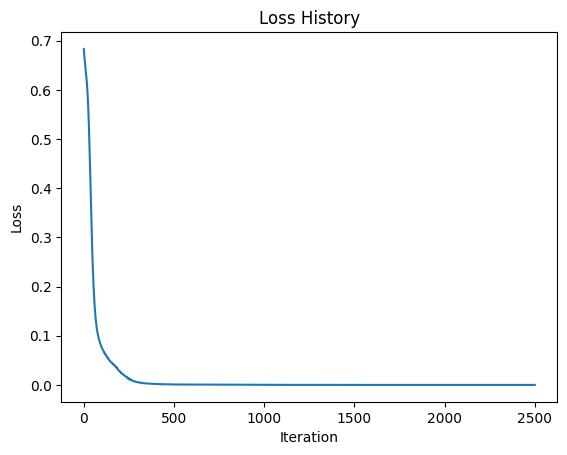

In [140]:
loss_history = mlp.loss_curve_

plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

MLP con 3 capas y 16 neuronas cada una

In [141]:
mlp1 = MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation='relu', max_iter=2500, learning_rate_init=0.001, random_state=42,n_iter_no_change=2500)
mlp1.fit(X_train, y_train)
predictions = mlp1.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)



Precisión del Modelo: 0.9064327485380117
Recall: 0.8529411764705882
F1 Score: 0.8787878787878787


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


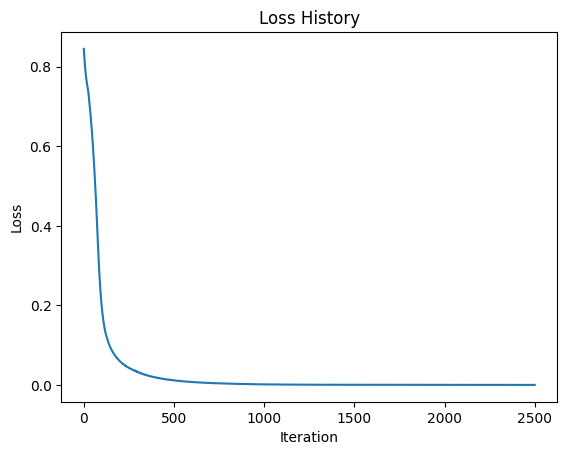

In [142]:
loss_history1 = mlp1.loss_curve_

plt.plot(loss_history1)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

##MLP con TANH

MLP con 4 capas y 16 neuronas cada una

In [143]:
mlp2 = MLPClassifier(hidden_layer_sizes=(16, 16, 16,16), activation='tanh', max_iter=2500, learning_rate_init=0.001, random_state=42,n_iter_no_change=2500)
mlp2.fit(X_train, y_train)
predictions = mlp2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precisión del Modelo: 0.9005847953216374
Recall: 0.8382352941176471
F1 Score: 0.8702290076335878


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


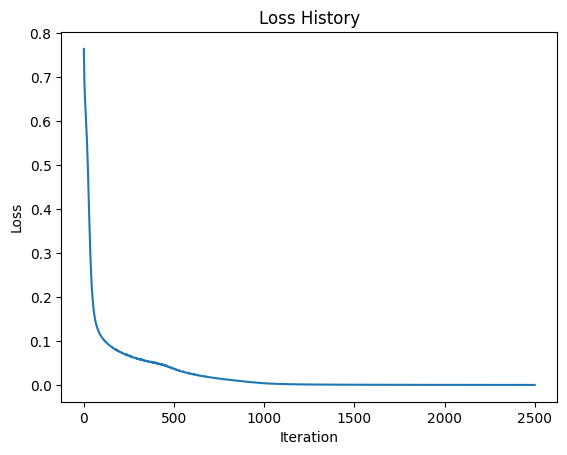

In [144]:
loss_history2 = mlp2.loss_curve_

plt.plot(loss_history2)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

MLP con 3 capas y 16 neuronas cada una

In [145]:
mlp21 = MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation='tanh', max_iter=2500, learning_rate_init=0.001, random_state=42,n_iter_no_change=2500)
mlp21.fit(X_train, y_train)
predictions = mlp21.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precisión del Modelo: 0.9064327485380117
Recall: 0.8676470588235294
F1 Score: 0.8805970149253731


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


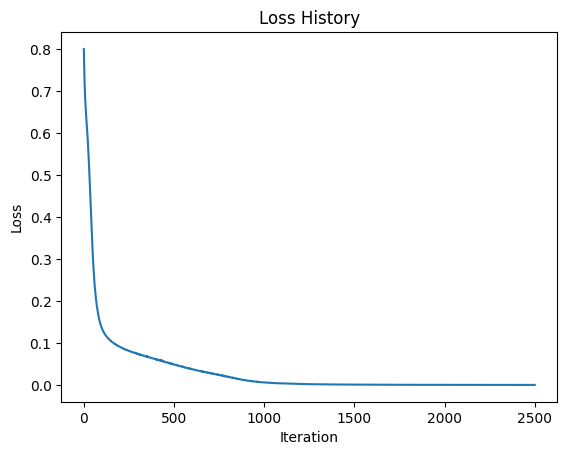

In [147]:
loss_history21 = mlp21.loss_curve_

plt.plot(loss_history21)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

##MLP con LOGISTIC


MLP con 4 capas y 16 neuronas cada una

In [148]:
mlp3 = MLPClassifier(hidden_layer_sizes=(16, 16,16,16), activation='logistic', max_iter=2500, learning_rate_init=0.001, random_state=42, n_iter_no_change=2500)
mlp3.fit(X_train, y_train)
predictions = mlp3.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precisión del Modelo: 0.8888888888888888
Recall: 0.8382352941176471
F1 Score: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


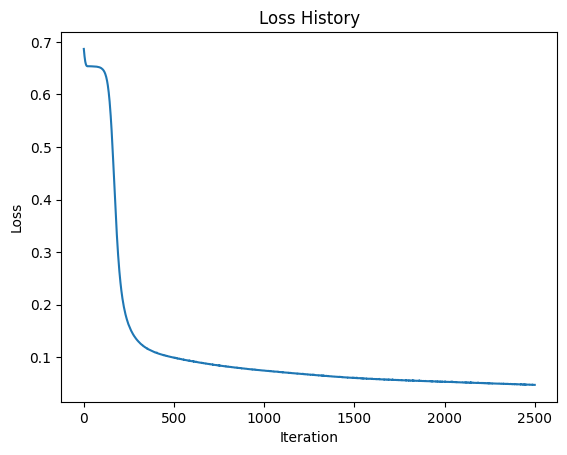

In [149]:
loss_history3 = mlp3.loss_curve_

plt.plot(loss_history3)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

MLP con 3 capas y 16 neuronas cada una

In [150]:
mlp31 = MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation='logistic', max_iter=2500, learning_rate_init=0.001, random_state=42,  n_iter_no_change=2500)
mlp31.fit(X_train, y_train)
predictions = mlp31.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisión del Modelo:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Precisión del Modelo: 0.9005847953216374
Recall: 0.8529411764705882
F1 Score: 0.8721804511278195


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


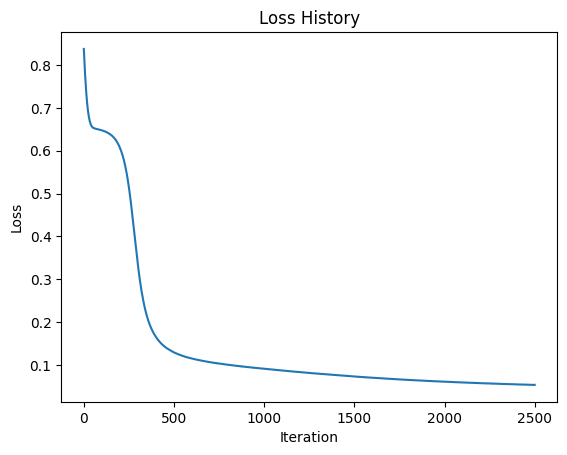

In [151]:
loss_history31 = mlp31.loss_curve_

plt.plot(loss_history31)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

#COMPARACIONES ENTRE FUNCIONES DE PERDIDAS

## Modelos con 4 capas

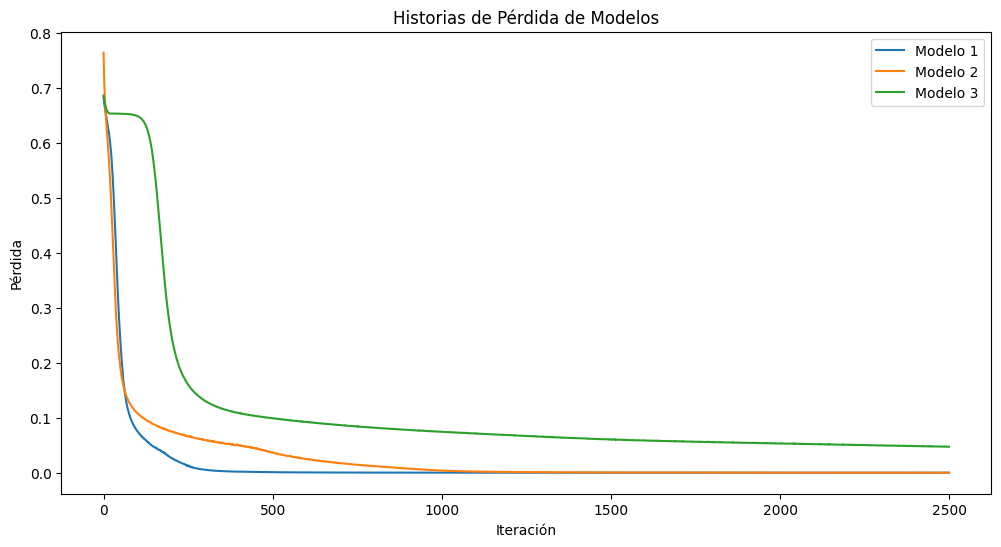

In [153]:
plt.figure(figsize=(12, 6))

plt.plot(loss_history, label='Modelo 1')
plt.plot(loss_history2, label='Modelo 2')
plt.plot(loss_history3, label='Modelo 3')

plt.title('Historias de Pérdida de Modelos')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## Modelos con 3 capas

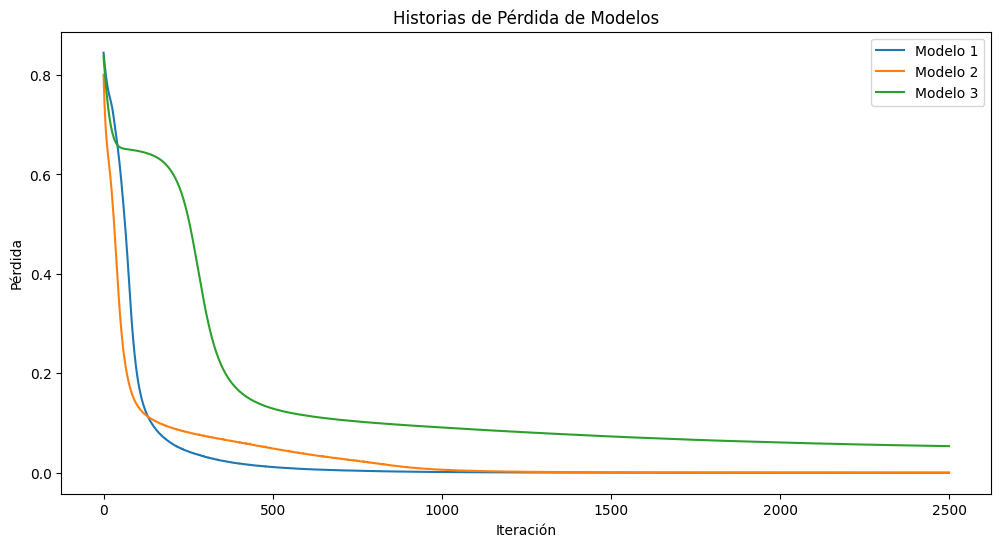

In [154]:
plt.figure(figsize=(12, 6))

plt.plot(loss_history1, label='Modelo 1')
plt.plot(loss_history21, label='Modelo 2')
plt.plot(loss_history31, label='Modelo 3')

plt.title('Historias de Pérdida de Modelos')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

##COMPARACION ENTRE CADA MODELO DE 4 CAPAS Y 3 CAPAS

MODELO 1

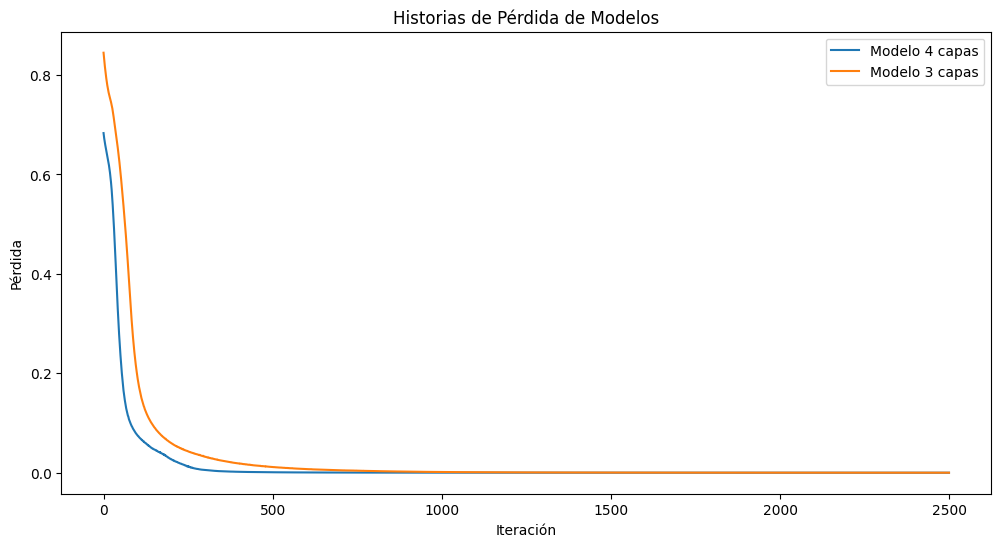

In [155]:
plt.figure(figsize=(12, 6))

plt.plot(loss_history, label='Modelo 4 capas')
plt.plot(loss_history1, label='Modelo 3 capas')

plt.title('Historias de Pérdida de Modelos')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

MODELO 2

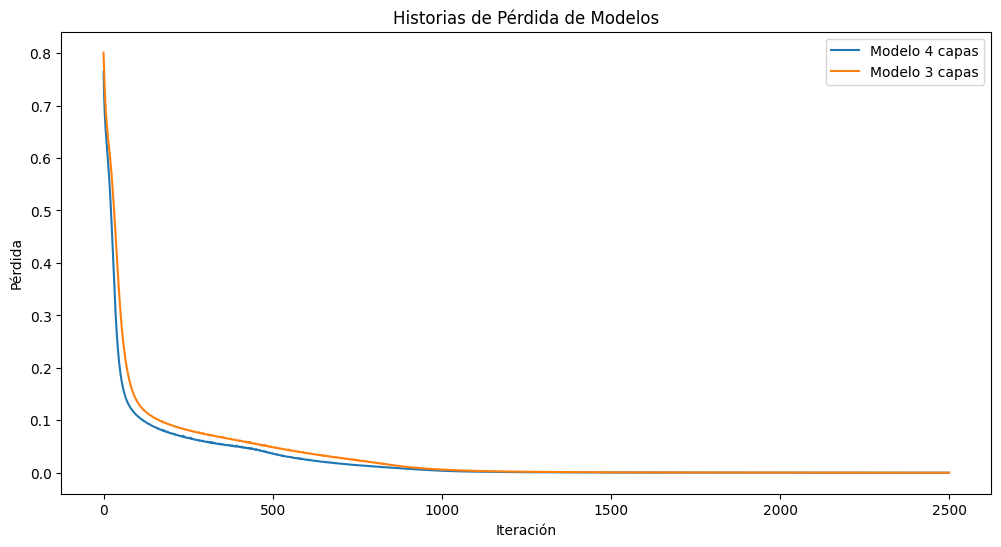

In [156]:
plt.figure(figsize=(12, 6))

plt.plot(loss_history2, label='Modelo 4 capas')
plt.plot(loss_history21, label='Modelo 3 capas')

plt.title('Historias de Pérdida de Modelos')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

MODELO 3

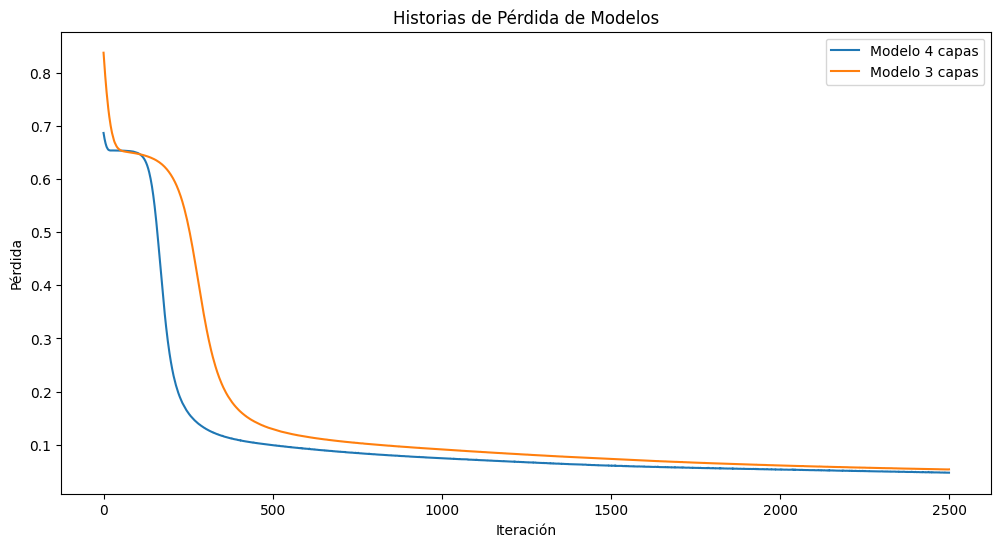

In [157]:
plt.figure(figsize=(12, 6))

plt.plot(loss_history3, label='Modelo 4 capas')
plt.plot(loss_history31, label='Modelo 3 capas')

plt.title('Historias de Pérdida de Modelos')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#FUTURAS PREDICCIONES DE PACIENTES

In [159]:
new_patient=df.iloc[567][2:]
patient_prediction = mlp.predict([new_patient])

if patient_prediction == 1:
    print("El nuevo paciente tiene un tumor cancerígeno.")
else:
    print("El nuevo paciente no tiene un tumor cancerígeno.")


El nuevo paciente no tiene cáncer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
